# Importing, cleaning and exploring data

Data source: https://www.kaggle.com/competitions/cafa-5-protein-function-prediction/data
Evaluation metrics: https://www.kaggle.com/competitions/cafa-5-protein-function-prediction/overview/evaluation


First, run the following code in the conda environment to prevent exceeding the IOPub data rate for loading fasta files and then reopen the kernel:

jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e8

And make sure all packages are installed:
- pip install biopython
- pip install pandas
- pip install obonet


In [3]:
# load packages
from Bio import SeqIO
import pandas as pd
import obonet as obo
import matplotlib.pyplot as plt

# go-basic.obo
includes the ontology graph structure for each GO term.

This part of the training set contains data for Molecular Function (MF), Biological Process (BP) or Cellular Component (CC) subontologies of GO, which is what will be predicted for the test set. 

In [4]:
# import go-basic.obo
graph = obo.read_obo('cafa-5-protein-function-prediction/Train/go-basic.obo')

# Convert the graph to a DataFrame and reset the index
go = pd.DataFrame.from_dict(graph.nodes, orient='index').reset_index()
go = go.rename(columns={go.columns[0]: 'term'})

# Keep only important columns
go = go[['term', 'name', 'namespace']]
go.sample(10)

,term,name,namespace
23185,GO:0048482,plant ovule morphogenesis,biological_process
2900,GO:0004475,mannose-1-phosphate guanylyltransferase (GTP) ...,molecular_function
36133,GO:1900275,negative regulation of phospholipase C activity,biological_process
22188,GO:0047363,triglucosylalkylacylglycerol sulfotransferase ...,molecular_function
39652,GO:1904253,positive regulation of bile acid metabolic pro...,biological_process
41865,GO:1990771,clathrin-dependent extracellular exosome endoc...,biological_process
36584,GO:1900821,orlandin biosynthetic process,biological_process
23967,GO:0050364,tryptophan dimethylallyltransferase activity,molecular_function
42895,GO:2000937,negative regulation of cellotriose catabolic p...,biological_process
41055,GO:1905775,negative regulation of DNA helicase activity,biological_process


In [5]:
go.describe()

,term,name,namespace
count,43248,43248,43248
unique,43248,43248,3
top,GO:0000001,mitochondrion inheritance,biological_process
freq,1,1,27942


In [6]:
# check for missing data
print('go: \n', go.isna().sum())

go: 
 term         0
name         0
namespace    0
dtype: int64


In [7]:
# Check for duplicate names in the 'Name' column
duplicates_go = go['term'].duplicated()

if duplicates_go.any():
    print("There are entries with the same name.")
else:
    print("All names are unique.")

All names are unique.


In [8]:
duplicates_name = go['name'].duplicated()

if duplicates_name.any():
    print("There are entries with the same name.")
else:
    print("All names are unique.")

All names are unique.


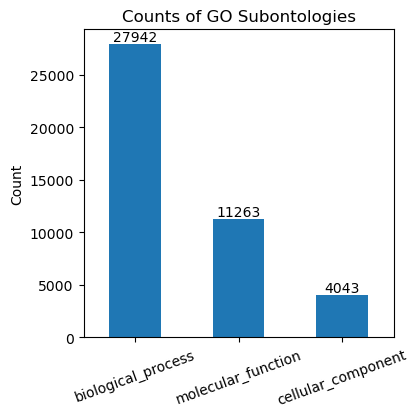

In [9]:
namespace_counts = go['namespace'].value_counts()
plt.figure(figsize=(4, 4))
namespace_counts.plot(kind='bar')
bar_plot = namespace_counts.plot(kind='bar')
plt.ylabel('Count')
plt.title('Counts of GO Subontologies')
plt.xticks(rotation = 20)
for index, value in enumerate(namespace_counts):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')
plt.show()

# train_sequences.fasta
includes the amino acid sequences for proteins in training set.

In [10]:
# import train_sequences.fasta

fasta_train = 'cafa-5-protein-function-prediction/Train/train_sequences.fasta'

train_sequences = []

# Open the FASTA file and iterate over each record
for record in SeqIO.parse(fasta_train, "fasta"):
    # Retrieve the sequence ID and sequence
    seq_id = record.id
    sequence = str(record.seq)
    
    # Append the sequence ID and sequence as a tuple to the list
    train_sequences.append((seq_id, sequence))

# convert to dataframe
trainset = pd.DataFrame(train_sequences, columns=['EntryID', 'sequence'])
trainset.head()

,EntryID,sequence
0,P20536,MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...
1,O73864,MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKL...
2,O95231,MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADFSLGSLP...
3,A0A0B4J1F4,MGGEAGADGPRGRVKSLGLVFEDESKGCYSSGETVAGHVLLEAAEP...
4,P54366,MVETNSPPAGYTLKRSPSDLGEQQQPPRQISRSPGNTAAYHLTTAM...


In [11]:
# check for missing data
print('trainset: \n', trainset.isna().sum())

trainset: 
 EntryID     0
sequence    0
dtype: int64


# train_taxonomy.tsv
includes the taxon ID for the proteins in training set.

In [12]:
# import train_taxonomy.tsv
train_taxon_ID = pd.read_csv("cafa-5-protein-function-prediction/Train/train_taxonomy.tsv", sep="\t")
train_taxon_ID.sample(5)

,EntryID,taxonomyID
39086,F4JEA6,3702
85046,A0A158VHB0,7955
98319,Q3U0X8,10090
60486,Q9UL11,9606
106686,O74737,284812


In [13]:
# check for missing data
print('train_taxon_ID: \n', train_taxon_ID.isna().sum())

train_taxon_ID: 
 EntryID       0
taxonomyID    0
dtype: int64


# train_terms.tsv
includes the training set of proteins and corresponding annotated GO terms.

In [14]:
# import train_terms.tsv
train_terms = pd.read_csv("cafa-5-protein-function-prediction/Train/train_terms.tsv", sep="\t")
train_terms.sample(5)

,EntryID,term,aspect
890997,P04693,GO:0009082,BPO
3973749,P46662,GO:0015629,CCO
1838426,Q0VGU4,GO:0007548,BPO
4673251,Q9Y548,GO:0043226,CCO
1244414,P30043,GO:0006725,BPO


In [15]:
# Check for duplicate names in the 'Name' column
duplicates_EntryID = train_terms['EntryID'].duplicated()

if duplicates_EntryID.any():
    print("There are entries with the same name.")
else:
    print("All names are unique.")

There are entries with the same name.


In [16]:
# check for missing data
print('train_terms: \n', train_terms.isna().sum())

train_terms: 
 EntryID    0
term       0
aspect     0
dtype: int64


# IA.txt
includes the “Information Accretion” weights for each GO term.. These weights are used to compute weighted precision and recall, as described in the Evaluation section.

In [17]:
# import IA.txt
IA = pd.read_csv("cafa-5-protein-function-prediction/IA.txt", delimiter='\t', header=None)
IA = IA.rename(columns={IA.columns[0]: 'term', IA.columns[1]: 'ia_score'})
IA.head()

,term,ia_score
0,GO:0000001,0.000000
1,GO:0000002,3.103836
2,GO:0000003,3.439404
3,GO:0000011,0.056584
4,GO:0000012,6.400377


In [18]:
# check for missing data
print('IA: \n', IA.isna().sum())

IA: 
 term        0
ia_score    0
dtype: int64


# testsuperset.fasta
includes the amino acid sequences for proteins on which the predictions should be made.

In [19]:
# import testsuperset.fasta
fasta_test = 'cafa-5-protein-function-prediction/Test (Targets)/testsuperset.fasta'

testsuperset = []

# Open the FASTA file and iterate over each record
for record in SeqIO.parse(fasta_test, "fasta"):
    # Retrieve the sequence ID and sequence
    seq_id = record.id
    sequence = str(record.seq)
    
    # Append the sequence ID and sequence as a tuple to the list
    testsuperset.append((seq_id, sequence))

# convert to dataframe
testset = pd.DataFrame(testsuperset, columns=['seq_id', 'sequence'])
testset.head()

,seq_id,sequence
0,Q9CQV8,MTMDKSELVQKAKLAEQAERYDDMAAAMKAVTEQGHELSNEERNLL...
1,P62259,MDDREDLVYQAKLAEQAERYDEMVESMKKVAGMDVELTVEERNLLS...
2,P68510,MGDREQLLQRARLAEQAERYDDMASAMKAVTELNEPLSNEDRNLLS...
3,P61982,MVDREQLVQKARLAEQAERYDDMAAAMKNVTELNEPLSNEERNLLS...
4,O70456,MERASLIQKAKLAEQAERYEDMAAFMKSAVEKGEELSCEERNLLSV...


In [20]:
# check for missing data
print('testset: \n', testset.isna().sum())

testset: 
 seq_id      0
sequence    0
dtype: int64


# testsuperset-taxon-list.tsv
inclues the taxon ID for proteins in test superset.

In [21]:
# import testsuperset-taxon-list.tsv
test_taxon = pd.read_csv("cafa-5-protein-function-prediction/Test (Targets)/testsuperset-taxon-list.tsv", sep="\t", encoding="ISO-8859-1")
test_taxon.sample(5)

,ID,Species
68,284591,Yarrowia lipolytica CLIB122 (budding yeast)
38,36329,Plasmodium falciparum 3D7
48,7460,Apis mellifera [honey bee]
37,3218,Physcomitrium patens [moses]
14,9823,Sus scrofa


In [22]:
# check for missing data
print('test_taxon: \n', test_taxon.isna().sum())

test_taxon: 
 ID         0
Species    0
dtype: int64


# sample_submission.tsv
is an example of a submission file in the correct format.

In [23]:
# sample_submission.tsv
sample_submission = pd.read_csv("cafa-5-protein-function-prediction/sample_submission.tsv", sep="\t", header=None)
sample_submission = sample_submission.rename(columns={sample_submission.columns[0]: 'protein_targets', sample_submission.columns[1]: 'term', sample_submission.columns[2]: 'prob_estimate'})
sample_submission.sample(4)

,protein_targets,term,prob_estimate
159523,Q7ZVB1,GO:0000002,0.123
262559,Q06178,GO:0000002,0.123
156363,Q7SD63,GO:0000002,0.123
80753,P40085,GO:0000002,0.123


# Merging the training data

In [24]:
# merge dataframes by go terms
go_merge = pd.merge(go, train_terms, on='term')
go_merge.head()

,term,name,namespace,EntryID,aspect
0,GO:0000001,mitochondrion inheritance,biological_process,P21147,BPO
1,GO:0000001,mitochondrion inheritance,biological_process,P32266,BPO
2,GO:0000001,mitochondrion inheritance,biological_process,P32381,BPO
3,GO:0000001,mitochondrion inheritance,biological_process,P35182,BPO
4,GO:0000001,mitochondrion inheritance,biological_process,P38880,BPO


In [25]:
go_merge.shape[0]

5363863

In [26]:
# merge dataframes by entryID
entryID_merge = pd.merge(trainset, train_taxon_ID, on='EntryID')
protein_train = pd.merge(go_merge, entryID_merge, on='EntryID')
protein_train.head()

,term,name,namespace,EntryID,aspect,sequence,taxonomyID
0,GO:0000001,mitochondrion inheritance,biological_process,P21147,BPO,MPTSGTTIELIDDQFPKDDSASSGIVDEVDLTEANILATGLNKKAP...,559292
1,GO:0003674,molecular_function,molecular_function,P21147,MFO,MPTSGTTIELIDDQFPKDDSASSGIVDEVDLTEANILATGLNKKAP...,559292
2,GO:0003824,catalytic activity,molecular_function,P21147,MFO,MPTSGTTIELIDDQFPKDDSASSGIVDEVDLTEANILATGLNKKAP...,559292
3,GO:0004768,stearoyl-CoA 9-desaturase activity,molecular_function,P21147,MFO,MPTSGTTIELIDDQFPKDDSASSGIVDEVDLTEANILATGLNKKAP...,559292
4,GO:0005575,cellular_component,cellular_component,P21147,CCO,MPTSGTTIELIDDQFPKDDSASSGIVDEVDLTEANILATGLNKKAP...,559292


In [27]:
protein_train.shape[0]

5363863

In [28]:
# find out how many classses are in the term column
unique_count = protein_train['term'].nunique()
print("Number of unique values:", unique_count)
    #31,466 is a lot of classes to characterize!

Number of unique values: 31466


In [29]:
print(type(protein_train.term))
print(type(protein_train.sequence))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [30]:
type(protein_train.name)

pandas.core.series.Series

# Extract kinase data

In [31]:
# extract observations that contain the string 'kinase'
kinases_train = protein_train[protein_train['name'].str.contains('kinase', case=False)]

In [32]:
kinases_train.shape[0] # represents 0.56% of the total data

30203

In [33]:
# find out how many classses are in the term column
unique_count = kinases_train['name'].nunique()
print("Number of unique values:", unique_count)
    #473 is a much more  doable number of classes to characterize!

Number of unique values: 473


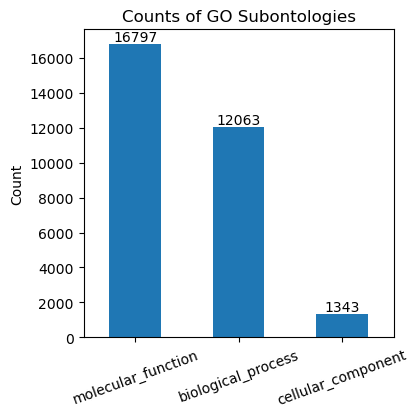

In [34]:
# view counts per GO subontology
namespace_counts = kinases_train['namespace'].value_counts()
plt.figure(figsize=(4, 4))
namespace_counts.plot(kind='bar')
bar_plot = namespace_counts.plot(kind='bar')
plt.ylabel('Count')
plt.title('Counts of GO Subontologies')
plt.xticks(rotation = 20)
for index, value in enumerate(namespace_counts):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')
plt.show()

In [36]:
kinases_train.head()

,term,name,namespace,EntryID,aspect,sequence,taxonomyID
318,GO:0033549,MAP kinase phosphatase activity,molecular_function,P35182,MFO,MSNHSEILERPETPYDITYRVGVAENKNSKFRRTMEDVHTYVKNFA...,559292
360,GO:1990439,MAP kinase serine/threonine phosphatase activity,molecular_function,P35182,MFO,MSNHSEILERPETPYDITYRVGVAENKNSKFRRTMEDVHTYVKNFA...,559292
1204,GO:0004672,protein kinase activity,molecular_function,Q0KHV6,MFO,MSVRLLTVRLIKHGRYILRSYCKRDIHANILDQNQLKTRSKRGFPL...,7227
1205,GO:0004674,protein serine/threonine kinase activity,molecular_function,Q0KHV6,MFO,MSVRLLTVRLIKHGRYILRSYCKRDIHANILDQNQLKTRSKRGFPL...,7227
1278,GO:0016301,kinase activity,molecular_function,Q0KHV6,MFO,MSVRLLTVRLIKHGRYILRSYCKRDIHANILDQNQLKTRSKRGFPL...,7227


# Support vector machine on kinase data

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [109]:
# split the data into features (X) and target variable (y)
X = kinases_train['sequence']
y = kinases_train['term']

In [110]:
# create a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [111]:
# extract features by convert sequences to k-mer features
k = 3
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(k, k))
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

In [ ]:
# train the model
svm = SVC(kernel='linear')  # Use a linear kernel for simplicity, but  can try other kernels
svm.fit(X_train_vectors, y_train)

In [ ]:
# predict values
y_pred = svm.predict(X_test_vectors)

In [ ]:
# evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# keras neural network on kinase data

In [96]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
import seaborn as sns

In [85]:
# extract features with 'term' as the target variable aka what's being predicted based on the input variable 'sequence' aka what's training the model
X = kinases_train['sequence']
y = kinases_train['term']

In [86]:
# label encoding to transform the target variable from categorical to numeric data
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [87]:
# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1001)

In [88]:
# convert the sequences into numeric representation using k-mers
k = 3
def convert_sequence_to_kmers(sequence, k):
    kmers = [sequence[i:i+k] for i in range(len(sequence)-k+1)]
    return kmers

def convert_kmers_to_int(kmers):
    kmers_to_int = {}
    int_value = 0
    encoded_sequence = []
    for kmer in kmers:
        if kmer not in kmers_to_int:
            kmers_to_int[kmer] = int_value
            int_value += 1
        encoded_sequence.append(kmers_to_int[kmer])
    return encoded_sequence

X_train_encoded = [convert_kmers_to_int(convert_sequence_to_kmers(seq, k)) for seq in X_train]
X_train_encoded = np.array(X_train_encoded)

X_test_encoded = [convert_kmers_to_int(convert_sequence_to_kmers(seq, k)) for seq in X_test]
X_test_encoded = np.array(X_test_encoded)

#can ignore VisibleDeprecationWarning because will be padded to a fixed length

C:\Users\ljbri\AppData\Local\Temp\ipykernel_17052\43525903.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_encoded = np.array(X_train_encoded)
C:\Users\ljbri\AppData\Local\Temp\ipykernel_17052\43525903.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_encoded = np.array(X_test_encoded)


In [89]:
# pad sequences to have the same length using zeros
max_sequence_length = max(len(seq) for seq in X_train_encoded)
num_classes = len(label_encoder.classes_)

X_train_padded = np.zeros((X_train_encoded.shape[0], max_sequence_length), dtype=np.int32)
for i, seq in enumerate(X_train_encoded):
    X_train_padded[i, :len(seq)] = seq

X_test_padded = np.zeros((X_test_encoded.shape[0], max_sequence_length), dtype=np.int32)
for i, seq in enumerate(X_test_encoded):
    X_test_padded[i, :len(seq)] = seq


In [90]:
# create the model
model1 = models.Sequential()
model1.add(Embedding(input_dim=np.max(X_train_padded) + 1, output_dim=64, input_length=max_sequence_length)) #observes sequential relationship
model1.add(keras.layers.GlobalAveragePooling1D()) # observes overall relationship; less computationally expensive than LSTM
model1.add(Dense(units=num_classes, activation='softmax')) #suitable for multi-class classification problems

model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 34348, 64)         372096    
                                                                 
 global_average_pooling1d_5   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_5 (Dense)             (None, 473)               30745     
                                                                 
Total params: 402,841
Trainable params: 402,841
Non-trainable params: 0
_________________________________________________________________


In [91]:
# compile the model
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [93]:
# train the model for 10 epoch to start
#takes 5 min per epoch
n_epochs = 10
n_batch = 4
model1.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs = n_epochs, batch_size = n_batch)


Epoch 1/10
6041/6041 [==============================] - 341s 56ms/step - loss: 4.4623 - accuracy: 0.1055 - val_loss: 4.4302 - val_accuracy: 0.1041
Epoch 2/10
6041/6041 [==============================] - 327s 54ms/step - loss: 4.4393 - accuracy: 0.1055 - val_loss: 4.4272 - val_accuracy: 0.1041
Epoch 3/10
6041/6041 [==============================] - 306s 51ms/step - loss: 4.4342 - accuracy: 0.1055 - val_loss: 4.4268 - val_accuracy: 0.1041
Epoch 4/10
6041/6041 [==============================] - 333s 55ms/step - loss: 4.4300 - accuracy: 0.1055 - val_loss: 4.4228 - val_accuracy: 0.1041
Epoch 5/10
6041/6041 [==============================] - 333s 55ms/step - loss: 4.4218 - accuracy: 0.1057 - val_loss: 4.4137 - val_accuracy: 0.1040
Epoch 6/10
6041/6041 [==============================] - 320s 53ms/step - loss: 4.4120 - accuracy: 0.1053 - val_loss: 4.4090 - val_accuracy: 0.1040
Epoch 7/10
6041/6041 [==============================] - 313s 52ms/step - loss: 4.4037 - accuracy: 0.1052 - val_loss: 4

In [94]:
# evaluate the model on the testing data
loss, accuracy = model1.evaluate(X_test_padded, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

189/189 [==============================] - 27s 142ms/step - loss: 4.3796 - accuracy: 0.1038
Test Loss: 4.379616737365723
Test Accuracy: 0.1037907600402832


In [105]:
# train the model for 100 epoch
n_epochs = 100
n_batch = 4
history1_100 = model1.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs = n_epochs, batch_size = n_batch)


Epoch 1/100
6041/6041 [==============================] - 279s 46ms/step - loss: 4.3764 - accuracy: 0.1057 - val_loss: 4.3848 - val_accuracy: 0.1040
Epoch 2/100
6041/6041 [==============================] - 314s 52ms/step - loss: 4.3718 - accuracy: 0.1055 - val_loss: 4.3767 - val_accuracy: 0.1040
Epoch 3/100
6041/6041 [==============================] - 306s 51ms/step - loss: 4.3661 - accuracy: 0.1058 - val_loss: 4.3784 - val_accuracy: 0.1033
Epoch 4/100
6041/6041 [==============================] - 281s 46ms/step - loss: 4.3612 - accuracy: 0.1058 - val_loss: 4.3661 - val_accuracy: 0.1036
Epoch 5/100
6041/6041 [==============================] - 281s 47ms/step - loss: 4.3570 - accuracy: 0.1058 - val_loss: 4.3648 - val_accuracy: 0.1038
Epoch 6/100
6041/6041 [==============================] - 281s 47ms/step - loss: 4.3534 - accuracy: 0.1050 - val_loss: 4.3670 - val_accuracy: 0.1040
Epoch 7/100
6041/6041 [==============================] - 279s 46ms/step - loss: 4.3487 - accuracy: 0.1063 - val_

6041/6041 [==============================] - 277s 46ms/step - loss: 4.2770 - accuracy: 0.1069 - val_loss: 4.3303 - val_accuracy: 0.1045
Epoch 57/100
6041/6041 [==============================] - 276s 46ms/step - loss: 4.2758 - accuracy: 0.1059 - val_loss: 4.3291 - val_accuracy: 0.1045
Epoch 58/100
6041/6041 [==============================] - 277s 46ms/step - loss: 4.2742 - accuracy: 0.1067 - val_loss: 4.3264 - val_accuracy: 0.1033
Epoch 59/100
6041/6041 [==============================] - 279s 46ms/step - loss: 4.2735 - accuracy: 0.1065 - val_loss: 4.3226 - val_accuracy: 0.1041
Epoch 60/100
6041/6041 [==============================] - 277s 46ms/step - loss: 4.2735 - accuracy: 0.1061 - val_loss: 4.3230 - val_accuracy: 0.1048
Epoch 61/100
6041/6041 [==============================] - 283s 47ms/step - loss: 4.2705 - accuracy: 0.1066 - val_loss: 4.3249 - val_accuracy: 0.1040
Epoch 62/100
6041/6041 [==============================] - 277s 46ms/step - loss: 4.2701 - accuracy: 0.1062 - val_loss: 

In [106]:
# evaluate the model on the testing data
loss, accuracy = model1.evaluate(X_test_padded, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

189/189 [==============================] - 23s 123ms/step - loss: 4.3195 - accuracy: 0.1054
Test Loss: 4.319468975067139
Test Accuracy: 0.10544611513614655


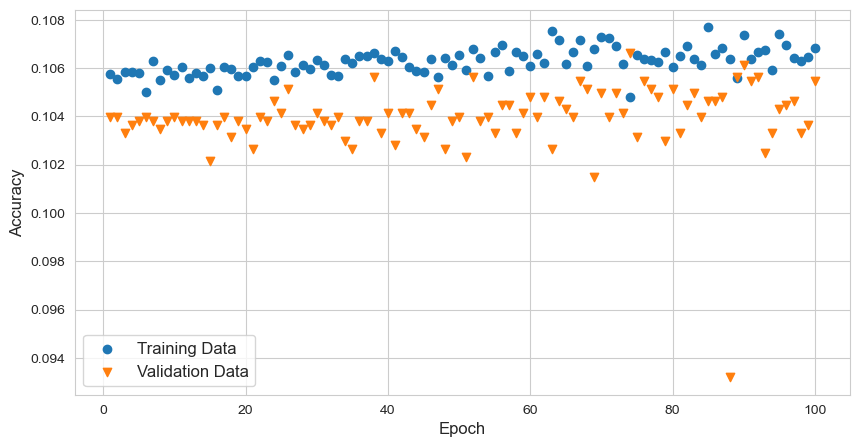

In [107]:
#plot training accuracy and validation accuracy against the epoch 
sns.set_style("whitegrid")

plt.figure(figsize=(10,5))

plt.scatter(range(1,n_epochs+1), 
            history1_100.history['accuracy'], 
            label="Training Data")
plt.scatter(range(1,n_epochs+1), 
            history1_100.history['val_accuracy'], 
            marker='v',
            label="Validation Data")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)


plt.legend(fontsize=12)


plt.show()

In [102]:
# create another model
model2 = models.Sequential()
model2.add(Embedding(input_dim=np.max(X_train_padded) + 1, output_dim=64, input_length=max_sequence_length)) #observes sequential relationship
model2.add(keras.layers.GlobalAveragePooling1D()) # observes overall relationship; less computationally expensive than LSTM
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(Dense(units=num_classes, activation='softmax')) #suitable for multi-class classification problems

model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 34348, 64)         372096    
                                                                 
 global_average_pooling1d_6   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 473)               30745     
                                                                 
Total params: 407,001
Trainable params: 407,001
Non-trainable params: 0
_________________________________________________________________


In [103]:
# compile the model
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
# train the model
#takes 5.5 min per epoch
n_epochs = 1
n_batch = 4
model2.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs = n_epochs, batch_size = n_batch)
#slightly better accuracy but not sig

6041/6041 [==============================] - 318s 52ms/step - loss: 4.5067 - accuracy: 0.1051 - val_loss: 4.4246 - val_accuracy: 0.1041


# CODE BELOW INCLUDES ATTEMPTS WITH KERAS WITHOUT EXTRACTING FOR KINASES AND WAS TOO COMPUTATIONALLY FOR THIS PROJECT.

# keras neural network (with subset) 
This code will require more memory than available in a standard PC, even with subsampling
subset_size = 10000 and batch_size=32 --> 23 days per epoch
subset_sizew = 2000 and batch_size =4 --> 11 hours per epoch

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

In [ ]:
# subset the data (when on my PC)
# minimize the time it takes to assign numbers to amino acid characters
# and prevent memory issues with padding sequences
subset_size = 2000
random_indices = np.random.choice(protein_train.index, size=subset_size, replace=False)
X_train_subset = protein_train.loc[random_indices, 'sequence']
y_train_subset = protein_train.loc[random_indices, 'term']

In [ ]:
# label encoding to transform the target variable from categorical to numeric data
label_encoder = LabelEncoder()
y_train_subset = label_encoder.fit_transform(y_train_subset)

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_subset, y_train_subset, test_size=0.2, random_state=420)

In [ ]:
# assigns numbers to each amino acid character
char_to_int = {'A': 0, 'R': 1, 'N': 2, 'D': 3, 'C': 4, 'Q': 5, 'E': 6, 'G': 7, 'H': 8, 'I': 9, 'L': 10, 'K': 11, 'M': 12, 'F': 13, 'P': 14, 'S': 15, 'T': 16, 'W': 17, 'Y': 18, 'V': 19}
num_classes = len(label_encoder.classes_)

# assigns a default value for characters not in the dictionary
default_value = 20  
def convert_char_to_int(char):
    return char_to_int.get(char, default_value)

# convert the sequences into numeric representation
X_train_encoded = [[convert_char_to_int(char) for char in seq] for seq in X_train]
X_train_encoded = np.array(X_train_encoded)

X_test_encoded = [[convert_char_to_int(char) for char in seq] for seq in X_test]
X_test_encoded = np.array(X_test_encoded)

#can ignore 'Warning: Creating an ndarray from ragged nested sequences' about X_train_encoded and X_test encoded being different lengths, because it will resolve when sequences are padded

In [ ]:
# pad sequences to have the same length using zeros
max_sequence_length = max(len(seq) for seq in X_train_subset)

X_train_padded = np.zeros((X_train_encoded.shape[0], max_sequence_length), dtype=np.int32)
for i, seq in enumerate(X_train_encoded):
    X_train_padded[i, :len(seq)] = seq
    
X_test_padded = np.zeros((X_test_encoded.shape[0], max_sequence_length), dtype=np.int32)
for i, seq in enumerate(X_test_encoded):
    X_test_padded[i, :len(seq)] = seq
    
type(X_train_padded)
print(X_train_padded)

In [ ]:
# create the model
model1 = models.Sequential()
model1.add(Embedding(input_dim=len(char_to_int), output_dim=64, input_length=max_sequence_length)) #convert amino acid sequences into dense vectors (captures sequential relationships between characters)
model1.add(LSTM(units=128)) #recurrent neural network  processes embedded sequences and extracts relevant features/patterns
model1.add(Dense(units=num_classes, activation='softmax'))

model1.summary()

In [ ]:
# compile the model
model1.compile(loss='sparse_categorical_crossentropy', #common when more than two categories
               optimizer='adam', #efficient and effective for deep learning tasks
               metrics=['accuracy']) #represents % of correctly predicted samples; common for classification


In [ ]:
# train the model for 1 epochs to start
model1.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=1, batch_size=4)

In [ ]:
# evaluate the model on the testing data
loss, accuracy = model1.evaluate(X_test_padded, y_test)
 
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# keras neural network (full)
This code on the full dataset will require more memory than available in a standard PC

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

In [ ]:
# extract features with 'term' as the target variable aka what's being predicted based on the input variable 'sequence' aka what's training the model
X = protein_train['sequence']
y = protein_train['term']

print(type(X))
print(type(y))

In [ ]:
# label encoding to transform the target variable from categorical to numeric data
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [ ]:
# define  max sequence length so we can pad all sequences to have the same length (recommended for neural networks that process inputs in fixed-size batches)
max_sequence_length = max(X_train.str.len())

In [ ]:
# assigns numbers to each amino acid character
#takes ~40 min
char_to_int = {'A': 0, 'R': 1, 'N': 2, 'D': 3, 'C': 4, 'Q': 5, 'E': 6, 'G': 7, 'H': 8, 'I': 9, 'L': 10, 'K': 11, 'M': 12, 'F': 13, 'P': 14, 'S': 15, 'T': 16, 'W': 17, 'Y': 18, 'V': 19}
num_classes = len(label_encoder.classes_)

# assigns a default value for characters not in the dictionary
default_value = -1 
def convert_char_to_int(char):
    return char_to_int.get(char, default_value)

# convert the sequences into numeric representation
X_train_encoded = [[convert_char_to_int(char) for char in seq] for seq in X_train]
X_train_encoded = np.array(X_train_encoded)

X_test_encoded = [[convert_char_to_int(char) for char in seq] for seq in X_test]
X_test_encoded = np.array(X_test_encoded)

#can ignore 'Warning: Creating an ndarray from ragged nested sequences' about X_train_encoded and X_test encoded being different lengths, because it will resolve when sequences are padded

In [ ]:
# pad sequences to have the same length using zeros
max_sequence_length = max(len(seq) for seq in X_train)

X_train_padded = np.zeros((X_train_encoded.shape[0], max_sequence_length), dtype=np.int32)
for i, seq in enumerate(X_train_encoded):
    X_train_padded[i, :len(seq)] = seq
    
X_test_padded = np.zeros((X_test_encoded.shape[0], max_sequence_length), dtype=np.int32)
for i, seq in enumerate(X_test_encoded):
    X_test_padded[i, :len(seq)] = seq
    
type(X_train_padded)
print(X_train_padded)

np.save('X_train_padded', X_train_padded)
np.save('X_test_padded', X_test_padded)

In [ ]:
# create the model
model1 = models.Sequential()
model1.add(Embedding(input_dim=num_classes, output_dim=64, input_length=max_sequence_length)) #convert amino acid sequences into dense vectors (captures sequential relationships between characters)
model1.add(LSTM(units=128)) #recurrent neural netowrk  processes embedded sequences and extracts relevant features/patterns
model1.add(Dense(units=num_classes, activation='softmax')) #fully connected final layer

model1.summary()

In [ ]:
# compile the model
model1.compile(loss='sparse_categorical_crossentropy', #common when more than two categories
               optimizer='adam', #efficient and effective for deep learning tasks
               metrics=['accuracy']) #represents % of correctly predicted samples; common for classification


In [ ]:
# train the model for 10 epochs
model1.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=10, batch_size=32)

In [ ]:
# evaluate the model on the testing data
loss, accuracy = model1.evaluate(X_test_padded, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

In [ ]:
# train the model for 100 epochs
n_epochs = 100

history1 = model1.fit(X_train_padded,
                       y_train,
                       epochs = n_epochs,
                       batch_size = 25,
                       validation_data = (X_test_padded, 
                                          y_test))

history1.history()

In [ ]:
#plot training accuracy and validation accuracy against the epoch 

sns.set_style("whitegrid")

plt.figure(figsize=(10,5))

plt.scatter(range(1,n_epochs+1), 
            history1.history['accuracy'], 
            label="Training Data")
plt.scatter(range(1,n_epochs+1), 
            history1.history['val_accuracy'], 
            marker='v',
            label="Validation Data")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)


plt.legend(fontsize=12)


plt.show()

# keras neural network (with subset and kmers) 
reduces from 11 hours to 5 hours with kmers when keeping everything else the same as the subset section

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

In [ ]:
# subset the data (when on my PC)
# minimize the time it takes to assign numbers to amino acid characters
# and prevent memory issues with padding sequences
subset_size = 2000
random_indices = np.random.choice(protein_train.index, size=subset_size, replace=False)
X_train_subset = protein_train.loc[random_indices, 'sequence']
y_train_subset = protein_train.loc[random_indices, 'term']


In [ ]:
# label encoding to transform the target variable from categorical to numeric data
label_encoder = LabelEncoder()
y_train_subset = label_encoder.fit_transform(y_train_subset)

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_subset, y_train_subset, test_size=0.2, random_state=420)


In [ ]:
# convert the sequences into numeric representation using k-mers
k = 3
def convert_sequence_to_kmers(sequence, k):
    kmers = [sequence[i:i+k] for i in range(len(sequence)-k+1)]
    return kmers

def convert_kmers_to_int(kmers):
    kmers_to_int = {}
    int_value = 0
    encoded_sequence = []
    for kmer in kmers:
        if kmer not in kmers_to_int:
            kmers_to_int[kmer] = int_value
            int_value += 1
        encoded_sequence.append(kmers_to_int[kmer])
    return encoded_sequence

X_train_encoded = [convert_kmers_to_int(convert_sequence_to_kmers(seq, k)) for seq in X_train]
X_train_encoded = np.array(X_train_encoded)

X_test_encoded = [convert_kmers_to_int(convert_sequence_to_kmers(seq, k)) for seq in X_test]
X_test_encoded = np.array(X_test_encoded)

In [ ]:
# pad sequences to have the same length using zeros
max_sequence_length = max(len(seq) for seq in X_train_encoded)
num_classes = len(label_encoder.classes_)

X_train_padded = np.zeros((X_train_encoded.shape[0], max_sequence_length), dtype=np.int32)
for i, seq in enumerate(X_train_encoded):
    X_train_padded[i, :len(seq)] = seq

X_test_padded = np.zeros((X_test_encoded.shape[0], max_sequence_length), dtype=np.int32)
for i, seq in enumerate(X_test_encoded):
    X_test_padded[i, :len(seq)] = seq


In [ ]:
# create the model
model1 = models.Sequential()
model1.add(Embedding(input_dim=np.max(X_train_padded) + 1, output_dim=64, input_length=max_sequence_length))
model1.add(LSTM(units=128)) #can reduce this to save some computational time, but 128 --> 32 only sav4ed ~40 min in this model
model1.add(Dense(units=num_classes, activation='softmax'))

model1.summary()

In [ ]:
# compile the model
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train the model for 1 epoch to start
model1.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=1, batch_size=4)


In [ ]:
# evaluate the model on the testing data
loss, accuracy = model1.evaluate(X_test_padded, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# keras neural network (with GPU support)

make sure the tensorflow package is installed with GPU support
- pip install tensorflow-gpu

for NVIDIA processor, may also have to do the following before installing tensorflow-gpu:
- update driver (https://www.nvidia.com/drivers)
- install CUDA kit (https://developer.nvidia.com/cuda-toolkit)
- install CUDA and cudnn kits (pip install nvidia-cudnn-cu11==8.6.0.163)

couldn't get the package to work :()